# 加载库与训练、验证数据

In [1]:
import pandas as pd
import xgboost as xgb
from config import *
from sklearn.preprocessing import MinMaxScaler

train=pd.read_csv('data/dataset2.csv')
train_x = train.drop(['label'],axis=1)
train_y = train.label

val=pd.read_csv('data/dataset1.csv')
val_x = val.drop(['label'],axis=1)
val_y = val.label

print train_x.shape,val_x.shape

train = xgb.DMatrix(train_x,train_y)
val = xgb.DMatrix(val_x,val_y)


(257126, 48) (136301, 48)


# 调节参数

In [2]:
params={'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'eval_metric':'auc',
	    'gamma':0.2,
	    'min_child_weight':1.2,
	    'max_depth':5,
	    'lambda':10,
	    'subsample':0.7,
	    'colsample_bytree':0.7,
	    'colsample_bylevel':0.7,
	    'eta': 0.01,
	    'tree_method':'exact',
	    'nthread':12
	    }

In [4]:
watchlist = [(train,'train'),(val,'val')]

model0 = xgb.train(params,train,num_boost_round=3000,evals=watchlist,early_stopping_rounds=300)#,xgb_model=model)


[0]	train-auc:0.80958	val-auc:0.792192
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 300 rounds.
[1]	train-auc:0.823604	val-auc:0.819937
[2]	train-auc:0.82926	val-auc:0.831921
[3]	train-auc:0.833304	val-auc:0.820483
[4]	train-auc:0.834501	val-auc:0.822796
[5]	train-auc:0.834902	val-auc:0.828375
[6]	train-auc:0.835445	val-auc:0.824026
[7]	train-auc:0.835545	val-auc:0.824562
[8]	train-auc:0.835735	val-auc:0.828275
[9]	train-auc:0.835576	val-auc:0.833338
[10]	train-auc:0.835525	val-auc:0.832189
[11]	train-auc:0.835507	val-auc:0.833727
[12]	train-auc:0.835365	val-auc:0.835448
[13]	train-auc:0.83583	val-auc:0.836881
[14]	train-auc:0.835319	val-auc:0.836638
[15]	train-auc:0.837144	val-auc:0.838451
[16]	train-auc:0.838094	val-auc:0.840555
[17]	train-auc:0.838893	val-auc:0.841287


KeyboardInterrupt: 

# 在所有数据上训练模型

In [3]:
all_train=pd.read_csv('data/all_train.csv')
all_train_x = all_train.drop(['label'],axis=1)
all_train_y = all_train.label

print all_train.shape

all_train = xgb.DMatrix(all_train_x,all_train_y)

(393427, 49)


In [4]:
params={'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'eval_metric':'auc',
	    'gamma':0.2,
	    'min_child_weight':1.1,
	    'max_depth':5,
	    'lambda':10,
	    'subsample':0.7,
	    'colsample_bytree':0.7,
	    'colsample_bylevel':0.7,
	    'eta': 0.070,
	    'tree_method':'exact',
	    'nthread':12
	    }

In [ ]:
watchlist = [(all_train,'train')]

model = xgb.train(params,all_train,num_boost_round=5000,evals=watchlist,early_stopping_rounds=300)#,xgb_model=model)


[0]	train-auc:0.837574
Will train until train-auc hasn't improved in 300 rounds.
[1]	train-auc:0.847154
[2]	train-auc:0.849954
[3]	train-auc:0.850329
[4]	train-auc:0.853353
[5]	train-auc:0.854305
[6]	train-auc:0.854575
[7]	train-auc:0.854103
[8]	train-auc:0.85397
[9]	train-auc:0.855138
[10]	train-auc:0.855477
[11]	train-auc:0.855474
[12]	train-auc:0.856791
[13]	train-auc:0.857125
[14]	train-auc:0.857673
[15]	train-auc:0.857792
[16]	train-auc:0.857837
[17]	train-auc:0.858638
[18]	train-auc:0.859084
[19]	train-auc:0.859935
[20]	train-auc:0.860219
[21]	train-auc:0.860475
[22]	train-auc:0.860775
[23]	train-auc:0.861046
[24]	train-auc:0.861122
[25]	train-auc:0.861448
[26]	train-auc:0.861811
[27]	train-auc:0.861989
[28]	train-auc:0.86244
[29]	train-auc:0.863035
[30]	train-auc:0.863235
[31]	train-auc:0.863342
[32]	train-auc:0.863459
[33]	train-auc:0.86358
[34]	train-auc:0.863716
[35]	train-auc:0.864195
[36]	train-auc:0.864427
[37]	train-auc:0.864913
[38]	train-auc:0.865085
[39]	train-auc:0.86

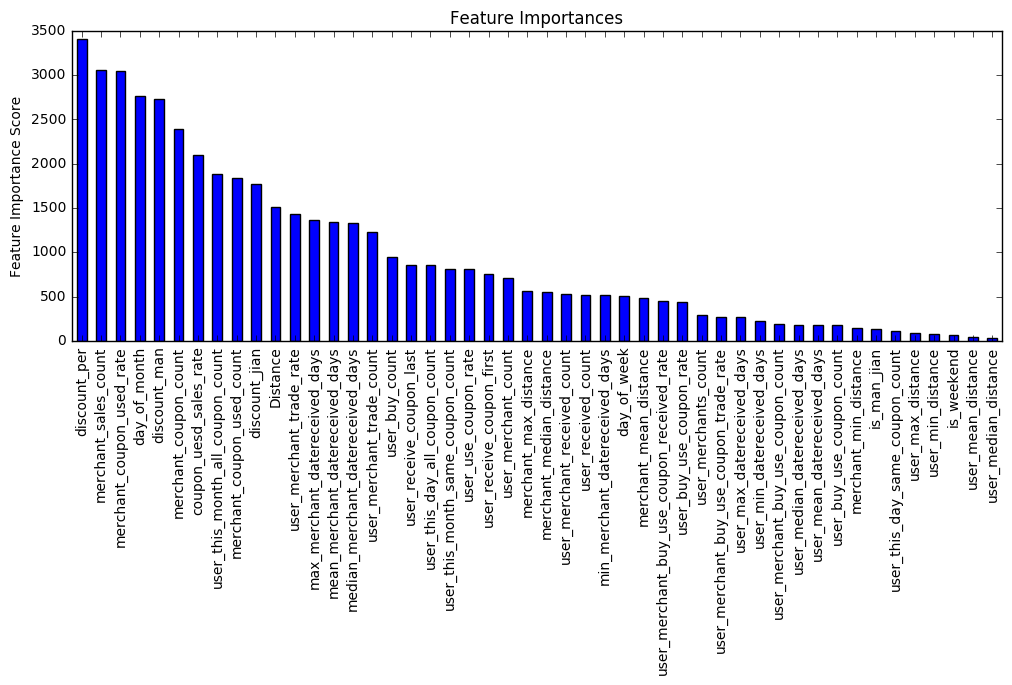

In [12]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

feat_imp = pd.Series(model.get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [9]:
test=pd.read_csv('data/all_test.csv')
test_x = test.drop(['User_id','Coupon_id','Merchant_id','Date_received','Discount_rate'],axis=1)
test_preds = test[['User_id','Coupon_id','Date_received']]

print test_x.shape
test = xgb.DMatrix(test_x)

(112803, 48)


In [11]:
model.save_model('001.model')
# model = xgb.Booster()
# model.load_model("0002.model")

In [11]:
#predict test set
test_preds.loc[:,'Probability'] = model.predict(test)
test_preds.Probability = MinMaxScaler().fit_transform(test_preds.Probability)
test_preds.sort_values(by=['Coupon_id','Probability'],inplace=True)
test_preds.to_csv("preds.csv",index=None)


/usr/local/Cellar/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/Cellar/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
